# <b><span style = "color:#317802;font-family:helvetica">Introduction to Topic Modeling

### <b><span style = "color:#317802;font-family:helvetica"> Topics Covered:
* Understanding Topic Modeling & How it is version of unsupervised learning
* Learn Latent Dirichlet Allocation 
* Implement LDA
* Understand Non-Negative Matrix Factorization
* Implement NMF

### `Topic Modeling` Overview

#### Topics modeling allows for us to efficiently analyze large volumes of text by clustering documents into topics.

#### A large amount of text data is `unlabeled` meaning we won't be able to apply supervised learning approaches to create machine learning models for the data!

* If we have `unlabeled` data, then we can attempt to `"discover"` labels.
* In the case of text data, this means attempting to discover clusters of documents, grouped together by topic

* A very important idea to keep in mind here is that we don't know the "correct" topic or "right answer"!
* All we know is that the couments clustered together share similar topic ideas.
* It is up to the user to identify what these topics represent.

# `Latent Dirichlet Allocation`

### There is a probability distribution named after `Johann Peter Gautav Lejeune Dirichlet` known as `Dirichlet Distribution`.

### `Latent Dirichlet Allocation` is based off this probability distribution.

### <b><span style = "color:#317802;font-family:helvetica"> There are two main Assumptions of LDA for Topic Modeling:
* Documents with similar topics use similar group of words
* Latent Topics can then be found by searching for groups of words that frequently occur together in documents accross the corpus.

### We can actually think these assumtions mathematically, the way we can model these assumptions :
* Documents are probability distributions over some underlying latent topics.
* Topics themselves are probability distributions over words.

* Documents are probability distibutions over given amount of latent topics.





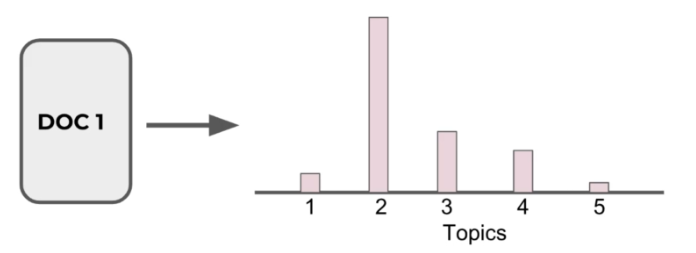

#### With the above example Doc1 has highest probability with matching Doc2

### Topic themselves are probability distribution over words.

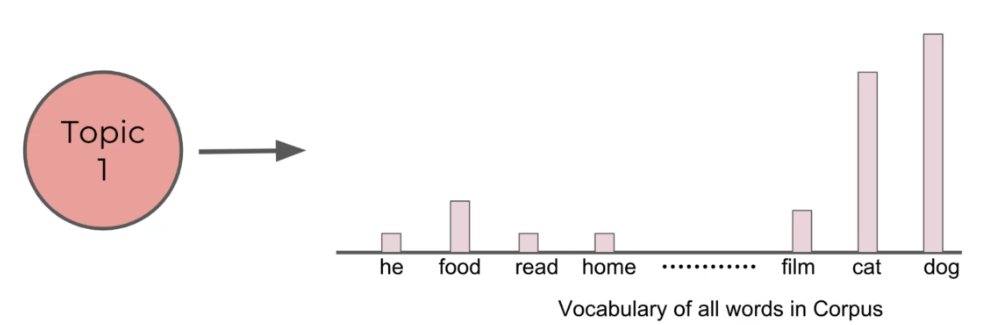

### We can define Topic as probability distribution over words, Here we see topic 1 has low probability with he but dog has probability fro belonging to topic 1

#### Here we will try to identify what this topic representative of. We can check top 10 highest probability words for Topic 1 and then we try to understand what the underline topic was. In this case we can make an educated guess that topic 1 has to do with pets.

### Its up to the user to understand the probability distribution.

## `LDA` represents documents as mixtures  of topic that split out words with certain probabilities.

### It assumes that documents are produced in the following fashion.
* Decide on the number of words N the document will have.
* Choose a topic mixture for the document(according to a Dirichlet distribution over a fixed set of K topics).
* e.g. 60% business, 20% policitcs, 10% food.
* Generate each word in the document by:
    * First picking a topic according to the multinomial distribution that you sampled previously (60% business, 20% policitics, 10% food)
* Using the topic to generate the word itself(according to the topic's multinomial distribution).
* For example, if we selected the food topic, we might generate the word "apple" with 60% probability, "home" with 30% probability and so on.

#### Assuming this generative model for a collection of documents, `LDA` then tries to backtrack fromthe documents to find a set of topics that atre likely to have generated the collection

### Let's see what `LDA` gona do

#### Now imagine we have a set of documents.
* We have chosen some fixed number of K topics to discover, and want to use LDA to learn the topic representation of each document and the words associated to each topic.So, as a user you should have some sort of intiuation before doing LDA that how many topics to be discovered.
* Go through each document, and rondomly assign each word in the document to one of the K topics.
* This random assignemnt already gives you both topic representations of all the documents and word distributions of all the topics(note. these initial random topics won't make sense).
* Now we iterate over every word in the every document to improve these topics.
* For every word in every document and for each topic t we calculate:
    * p(topic t | document d) = the proportion od words in document d that are currently assigned to topic t
* Reassign w a new topic, where we choose topi t with probability 
    * p(topic t | document d) * p(word w | topic t)
* This is essentially the probability that topic t generated word w

* After repeating the previous step a large number of times, we eventually reach a roughly steady state where the assignments are acceptable.
* At the end we have each document assigned to a topic
* we also can seach for the words that have the highest probability of being assigned to a topic.

### We end up with an outpput such as:
* Documnet assigned to topic #4
* Most common words (highest probability) for Topic #4:
    * ['cat','vet','birds', 'dog',...,'food','home']
* It is up to the user to interpret these topics

### Two important notes:
* The user must decide on the amount of topics present in the document.
* The user must interpret what the topics are.

### We will now explore how to implement `LDA` with python!

# `Latent Dirichlet Allocation with python`

In [1]:
import pandas as pd

In [2]:
npr = pd.read_csv("npr.csv")

In [3]:
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


### We can see in the data there is article given but no topic

In [4]:
npr["Article"][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

In [5]:
len(npr)

11992

### We have 11992 articles in the dataset.

#### Before doing LDA , we can do some preprocessing

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
### max_df while building up the Vocabualry we are going to ignore certain terms to have really high document frequency
### this will get rid off terms which are really common across the documents. so .90 means 90% words show up the docs
### its coutner part is min_df

In [8]:
dtm = cv.fit_transform(npr["Article"])

In [9]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

#### Now we will perform LDA, it is builtin in sklearn

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

### `LDA` parameters

`class sklearn.decomposition.LatentDirichletAllocation(n_components=10, *, doc_topic_prior=None, topic_word_prior=None, learning_method='batch', learning_decay=0.7, learning_offset=10.0, max_iter=10, batch_size=128, evaluate_every=-1, total_samples=1000000.0, perp_tol=0.1, mean_change_tol=0.001, max_doc_update_iter=100, n_jobs=None, verbose=0, random_state=None)`

In [11]:
LDA = LatentDirichletAllocation(n_components= 7, random_state= 42)
### for n_componets there is no right or wrong answer, it really depend on domain knowledge

In [12]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

### fit process takes time because as we saw it's an iterative process.

In [14]:
### Grab the vocabulary of words


In [13]:
len(cv.get_feature_names_out())

54777

In [15]:
type(cv.get_feature_names_out())

numpy.ndarray

In [17]:
cv.get_feature_names_out()[50000]

'transcribe'

In [18]:
cv.get_feature_names_out()[41000]

'reproductive'

In [23]:
import random

random_word_id = random.randint(0,54777)

cv.get_feature_names_out()[10]

'01'

In [24]:
### Grab the topics

len(LDA.components_)

7

In [26]:
type(LDA.components_)### its a array of probabilities of each word

numpy.ndarray

In [27]:
LDA.components_.shape

(7, 54777)

In [28]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [29]:
### We will grab one of the topics above

In [30]:
single_topic = LDA.components_[0]

In [31]:
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993], dtype=int64)

In [33]:
## Argsort ---retruns-- INDEX postitions sorted from LEAST ---> GREATEST
# Top 10 Values(10 Greatest Values)
# LAST 10 Values of ARGsort()
single_topic.argsort()[-10:]# Grab the last 10 values of .argsort()

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993], dtype=int64)

In [34]:
top_ten_words = single_topic.argsort()[-10:]

In [35]:
for index in top_ten_words:
    print(cv.get_feature_names_out()[index])

new
percent
government
company
million
care
people
health
said
says


### With this we can see it can be business article, or government, or health

### We can check more than top 10 Words

In [37]:
top_twenty_words = single_topic.argsort()[-20:]
for index in top_twenty_words:
    print(cv.get_feature_names_out()[index])

president
state
tax
insurance
trump
companies
money
year
federal
000
new
percent
government
company
million
care
people
health
said
says


### Its looks more of business and Health insurance

In [38]:
#### Grab the  highest probability words per topic.

In [39]:
### Now lets right the loop which gives 15 greatest words for 7 topics

In [41]:
for i,topic in enumerate(LDA.components_):
    print(f"The top 15 words for topic #{i}")
    print([cv.get_feature_names_out()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

The top 15 words for topic #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']




The top 15 words for topic #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']




The top 15 words for topic #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']




The top 15 words for topic #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']




The top 15 words for topic #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']




The top 15 words for topic #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know'

In [42]:
### Attach topic numbers to the original data

In [43]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [44]:
npr

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
...,...
11987,The number of law enforcement officers shot an...
11988,"Trump is busy these days with victory tours,..."
11989,It’s always interesting for the Goats and Soda...
11990,The election of Donald Trump was a surprise to...


In [45]:
topic_results = LDA.transform(dtm)

In [46]:
topic_results

array([[1.61040465e-02, 6.83341493e-01, 2.25376318e-04, ...,
        2.99652737e-01, 2.25479379e-04, 2.25497980e-04],
       [3.63424997e-02, 8.86130697e-01, 4.40751747e-04, ...,
        7.57636804e-02, 4.40866779e-04, 4.40835574e-04],
       [3.28569485e-04, 6.96344889e-01, 3.28302105e-04, ...,
        3.02012902e-01, 3.28724083e-04, 3.28352652e-04],
       ...,
       [1.44467964e-02, 1.60696622e-01, 1.73678310e-01, ...,
        2.24636569e-02, 3.98728349e-04, 3.98359730e-04],
       [4.33560738e-04, 3.53196803e-02, 4.33022554e-04, ...,
        9.62512640e-01, 4.33971991e-04, 4.33490254e-04],
       [3.98777533e-01, 2.54376049e-04, 3.59290659e-01, ...,
        2.40914375e-01, 2.54445555e-04, 2.54253739e-04]])

### its an array and if we check the shape

In [47]:
topic_results.shape

(11992, 7)

In [50]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

Thease are probability of document belonging to a topic

In [51]:
npr['Article'][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

#### We can see the 1st article is related to topic 2

In [52]:
topic_results[0].argmax()

1

In [53]:
npr["Topic"] = topic_results.argmax(axis = 1)

In [54]:
npr

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
...,...,...
11987,The number of law enforcement officers shot an...,1
11988,"Trump is busy these days with victory tours,...",4
11989,It’s always interesting for the Goats and Soda...,3
11990,The election of Donald Trump was a surprise to...,4


### That was for LDA now we will look at Non-negative Matrix Factorization

# ` Non-negative Matrix Factorization Overview`

#### Non-Negative Matrix Factorization is an unsupervised algorithm that simultaneously performs dimensionality reduction and clustering

#### We can use it in conjunction with `TF_IDF` to model topics across documents

### `General Mathematics`

#### Given a non-negative maatrix A, find k-dimension approximation in term of non-negative factors W and H

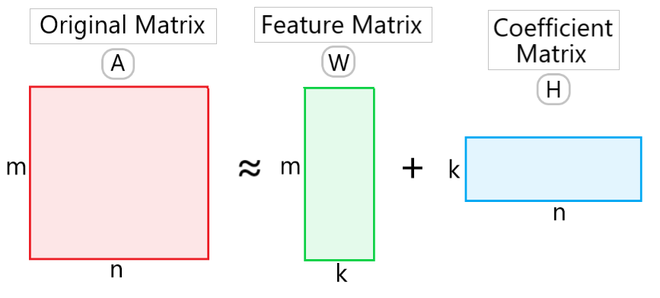

### We will have some matrix A with n x m (rows and columns) and we want to perform factorization to essientially approximate A with matrix multiplcatio of W and H

### Approximate  each object (i.e. column of A by a linear combination of K reduced dimentions or "Basis Vector or Feature Vector" in W

### Each bais vector can be interpreted as a cluster. The memberships of objects in these clusters encoded by H.

### Input: Non-negative data matrix(A), number of basis vectors(k), intial values for factors W and H(e.g. random matricies).

### Objective Function: Some measure of reconstruction error between A and the approximatin WH




$\large\frac{1}{2}{||}{A}-{WH}{||}^{2}_{F}{ = }\sum^{n}_{i=1}\sum^{m}_{j=1}{(}{A}_{ij}{ - }{(}{WH}{)}_{ij}{)}^{2}$

### Then we do optimation
* Expectation-maximization optimisation to rrefine W and H in roder to minimise the objective fucntion. Common approach is to iterate between two multiplicative update rules until convergence

### 1. Update H

$\large{H}_{cj}\leftarrow{H}_{cj}\frac{{(}{W A}{)}_{cj}}{{(}{W W H}{)}_{cj}}$

### 1. Update W

$\large{W}_{cj}\leftarrow{W}_{cj}\frac{{(}{A H}{)}_{cj}}{{(}{W H H}{)}_{cj}}$

### So the way it works as per our case which we will see:
* Construct vector space model for documents(after stopwords filtering), resulting in a term-documetn matrix A.
* Apply TF-IDF term weight normalization to A.
* Normalize TF-IDF vectors until lenght.-Above three steps can be done with one call of TF-IDF
* Initialize factors using NNDSVD on A.(NNDSVD  - Non-negative double singular value decomposition)
* Apply projected gradient NMF to A

### Then we end up discovering Basis Vectors: the topics(clusters) in the data.

### Coefficient matrix: the membership weights for documents relative to each topic(cluster)

### All we are doing is creating a document term martix with TF-IDF vectorization

### We will have resulting W and H

### Keep in mind
* Jusy like LDA, we will need to select the number of expected topics beforehand(the Value of K)!
* Also just like with LDA, we will have to interpret the topics based off the coefficient values of the words per topic.

* Due to Scikit-Learn's Unifrom syntax , switiching out LDA for NMF is very simple

# `Non-negative Matix Factorization with Python`

In [55]:
import pandas as pd
npr = pd.read_csv("npr.csv")

### With LDA as it depends count we could have only used count vectorization, but NNF we will use TF-IDF for vectorization

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [58]:
dtm = tfidf.fit_transform(npr["Article"])

In [59]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.float64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [60]:
from sklearn.decomposition import NMF

### NMF Parameters
`class sklearn.decomposition.NMF(n_components=None, *, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha_W=0.0, alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)`

In [61]:
nmf_model=NMF(n_components=7, random_state=42)

In [62]:
nmf_model.fit(dtm)

NMF(n_components=7, random_state=42)

In [63]:
tfidf.get_feature_names_out()[2300]

'albala'

### With LDA we dealt with words with highest probabilities with NNF we are deal with high coeffiecnt values.

In [64]:
for index, topic in enumerate(nmf_model.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')
   

THE TOP 15 WORDS FOR TOPIC #0
['new', 'research', 'like', 'patients', 'health', 'disease', 'percent', 'women', 'virus', 'study', 'water', 'food', 'people', 'zika', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['gop', 'pence', 'presidential', 'russia', 'administration', 'election', 'republican', 'obama', 'white', 'house', 'donald', 'campaign', 'said', 'president', 'trump']


THE TOP 15 WORDS FOR TOPIC #2
['senate', 'house', 'people', 'act', 'law', 'tax', 'plan', 'republicans', 'affordable', 'obamacare', 'coverage', 'medicaid', 'insurance', 'care', 'health']


THE TOP 15 WORDS FOR TOPIC #3
['officers', 'syria', 'security', 'department', 'law', 'isis', 'russia', 'government', 'state', 'attack', 'president', 'reports', 'court', 'said', 'police']


THE TOP 15 WORDS FOR TOPIC #4
['primary', 'cruz', 'election', 'democrats', 'percent', 'party', 'delegates', 'vote', 'state', 'democratic', 'hillary', 'campaign', 'voters', 'sanders', 'clinton']


THE TOP 15 WORDS FOR TOPIC #5
['love', 've', 'don', 'al

In [65]:
topic_results = nmf_model.transform(dtm)

In [67]:
topic_results.argmax(axis = 1)

array([1, 1, 1, ..., 0, 4, 3], dtype=int64)

In [68]:
npr['Topic'] = topic_results.argmax(axis =1)

In [69]:
npr.head()

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3
4,"From photography, illustration and video, to d...",6


In [70]:
mytopic_dict ={0:'Health',1:"Polictics",2:'Insurance',3:"International Polictics",4:"Elections",5:"Lifestyle & Music",6:"Education"}

In [71]:
npr["Topic_label"]=npr["Topic"].map(mytopic_dict)

In [72]:
npr.head()

,Article,Topic,Topic_label
0,"In the Washington of 2016, even when the polic...",1,Polictics
1,Donald Trump has used Twitter — his prefe...,1,Polictics
2,Donald Trump is unabashedly praising Russian...,1,Polictics
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3,International Polictics
4,"From photography, illustration and video, to d...",6,Education


# `Practical Example`

For this example we will be working with a dataset of over 400,000 quora questions that have no labeled cateogry, and attempting to find 20 cateogries to assign these questions to. 

In [74]:
import pandas as pd
quora = pd.read_csv('quora_questions.csv')

In [75]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


### Preprocessing wiht Tf-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [79]:
dtm = tfidf.fit_transform(quora['Question'])

In [80]:
dtm

<404289x38669 sparse matrix of type '<class 'numpy.float64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

### Non Negative Matrix Factorization

In [81]:
from sklearn.decomposition import NMF

In [84]:
nmf_model = NMF(n_components=20, random_state=42 , max_iter=10000)

In [85]:
nmf_model.fit(dtm)

NMF(max_iter=10000, n_components=20, random_state=42)

In [89]:
tfidf.get_feature_names_out()[2000]

'afghan'

In [90]:
nmf_model.components_

array([[0.00000000e+00, 5.65092701e-02, 5.42127292e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24553666e-03, 0.00000000e+00, 3.47094202e-05, ...,
        0.00000000e+00, 3.66959931e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07751038e-04, 4.92508600e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.84859441e-05, 4.54677374e-04, 6.05888945e-05, ...,
        1.70508633e-03, 0.00000000e+00, 1.70508633e-03],
       [3.44985878e-04, 0.00000000e+00, 4.81894019e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [92]:
for index, topic in enumerate(nmf_model.components_):
    print(f"The Top 20 words for the Topic #{index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 20 words for the Topic #0
['thing', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'laptop', 'movie', 'ways', '2016', 'books', 'book', 'movies', 'best']


The Top 20 words for the Topic #1
['majors', 'recruit', 'sex', 'looking', 'differ', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


The Top 20 words for the Topic #2
['add', 'answered', 'needing', 'post', 'easily', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


The Top 20 words for the Topic #3
['using', 'website', 'investment', 'friends', 'black', 'internet', 'free', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


The Top 20 words for the Topic #4
['balance', 'earth', 'day', 'death', 'changed', 'live', 'want', 'change', 'moment', 'real', 'important', 'thing', 'meaning', 'purpose', 'life']


The Top 20 words for the Topic #5
['reservation', 'engineering', 'minister', 'president', 'company', 'china',

In [93]:
topic_results = nmf_model.transform(dtm)

In [94]:
quora["Topic"] = topic_results.argmax(axis = 1)

In [95]:
quora.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14


# `Thank You`